#### Dependencies

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

### Largest Subreddits

Load MongoDB query result

In [2]:
with open('subreddit_popularity.txt', 'r') as f:
    data = f.read().splitlines()

data = [line.replace("'", '"') for line in data]

data = [json.loads(line) for line in data]

df = pd.DataFrame(data)

Log base 10 transform the number of posts

In [3]:
df['log10_post_number'] = df['post_number'].apply(lambda x: np.log10(x))

plot distribution of number of posts

Text(0, 0.5, 'Number of subreddits')

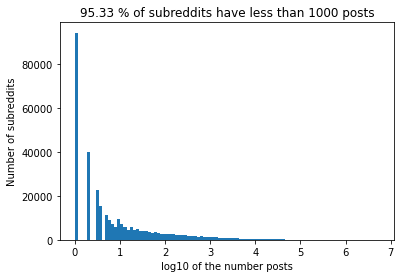

In [10]:
small_df = df[df['log10_post_number'] < 3]

plt.hist(df['log10_post_number'], bins=100)
plt.title(f'{round((len(small_df) / len(df) * 100), 2)} % of subreddits have less than 1000 posts')
plt.xlabel('log10 of the number posts')
plt.ylabel('Number of subreddits')


Find the 200 largest subreddits

In [ ]:
top_100 = df.sort_values(by='post_number', ascending=False).head(100)
top_200 = df.sort_values(by='post_number', ascending=False).head(200)
top_300 = df.sort_values(by='post_number', ascending=False).head(300)

df['top_100'] = df['subreddit'].apply(lambda x: x in top_100['subreddit'].values)
df['top_200'] = df['subreddit'].apply(lambda x: x in top_200['subreddit'].values)
df['top_300'] = df['subreddit'].apply(lambda x: x in top_300['subreddit'].values)

df['top_100'] = df['top_100'].map({True: 'Top 100', False: 'Rest of subreddits'})
df['top_200'] = df['top_200'].map({True: 'Top 200', False: 'Rest of subreddits'})
df['top_300'] = df['top_300'].map({True: 'Top 300', False: 'Rest of subreddits'})

group_100_share = df.groupby('top_100')['post_number'].sum().map(lambda x: x / df['post_number'].sum())
group_200_share = df.groupby('top_200')['post_number'].sum().map(lambda x: x / df['post_number'].sum())
group_300_share = df.groupby('top_300')['post_number'].sum().map(lambda x: x / df['post_number'].sum())

group_100_share.plot(kind='bar')
group_200_share.plot(kind='bar')
group_300_share.plot(kind='bar')


/home/guest/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
/home/guest/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/home/guest/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


[Text(0, 0, 'Rest of subreddits'), Text(1, 0, 'Top 300')]

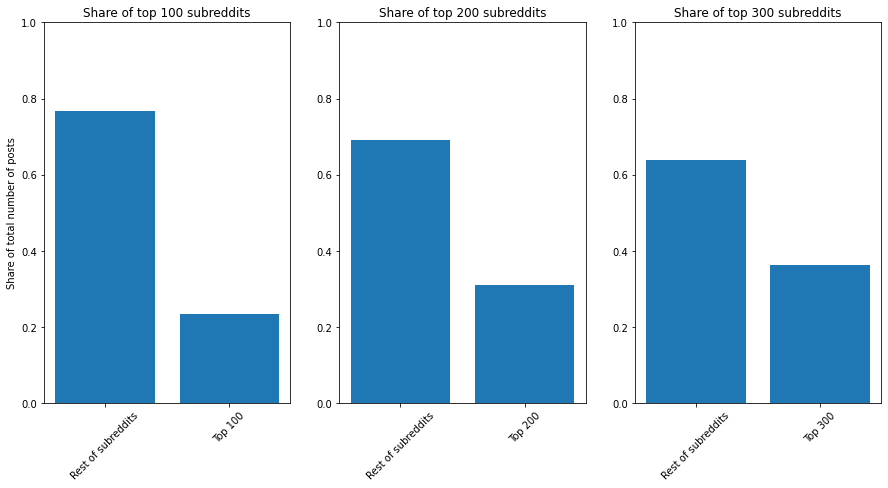

In [30]:
figure, axes = plt.subplots(1, 3, figsize=(15, 7))
axes[0].bar(group_100_share.index, group_100_share.values)
axes[0].set_title('Share of top 100 subreddits')
axes[0].set_ylim(0, 1)
axes[0].set_xticklabels(group_100_share.index, rotation=45)
axes[0].set_ylabel('Share of total number of posts')

axes[1].bar(group_200_share.index, group_200_share.values)
axes[1].set_title('Share of top 200 subreddits')
axes[1].set_ylim(0, 1)
axes[1].set_xticklabels(group_200_share.index, rotation=45)

axes[2].bar(group_300_share.index, group_300_share.values)
axes[2].set_title('Share of top 300 subreddits')
axes[2].set_ylim(0, 1)
axes[2].set_xticklabels(group_300_share.index, rotation=45)


In [24]:
top_100.to_csv('top_100_subreddits.csv', index=False)
top_200.to_csv('top_200_subreddits.csv', index=False)
top_300.to_csv('top_300_subreddits.csv', index=False)